✅ Model loaded successfully

📁 Found 38 class folders in: C:\Users\anask\crop-disease-detection\data\raw\plantvillage-dataset\plantvillage dataset\color
   Sample classes: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust']
Found 54305 images belonging to 38 classes.

✅ Generator created:
   Classes: 38
   Total images: 54305

📊 Class labels (first 5):
   0. Apple___Apple_scab
   1. Apple___Black_rot
   2. Apple___Cedar_apple_rust
   3. Apple___healthy
   4. Blueberry___healthy

🔄 Making predictions (this may take a few minutes)...


C:\Users\anask\miniconda3\envs\crop_tf\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1698/1698 ━━━━━━━━━━━━━━━━━━━━ 903s 531ms/step

✅ Predictions complete
   Samples evaluated: 54305
   Unique classes in data: 38

OVERALL METRICS
  Accuracy:  0.9265 (92.65%)
  Precision: 0.9381
  Recall:    0.9265
  F1-Score:  0.9255

📈 Generating confusion matrix...
✅ Confusion matrix saved to confusion_matrix.png


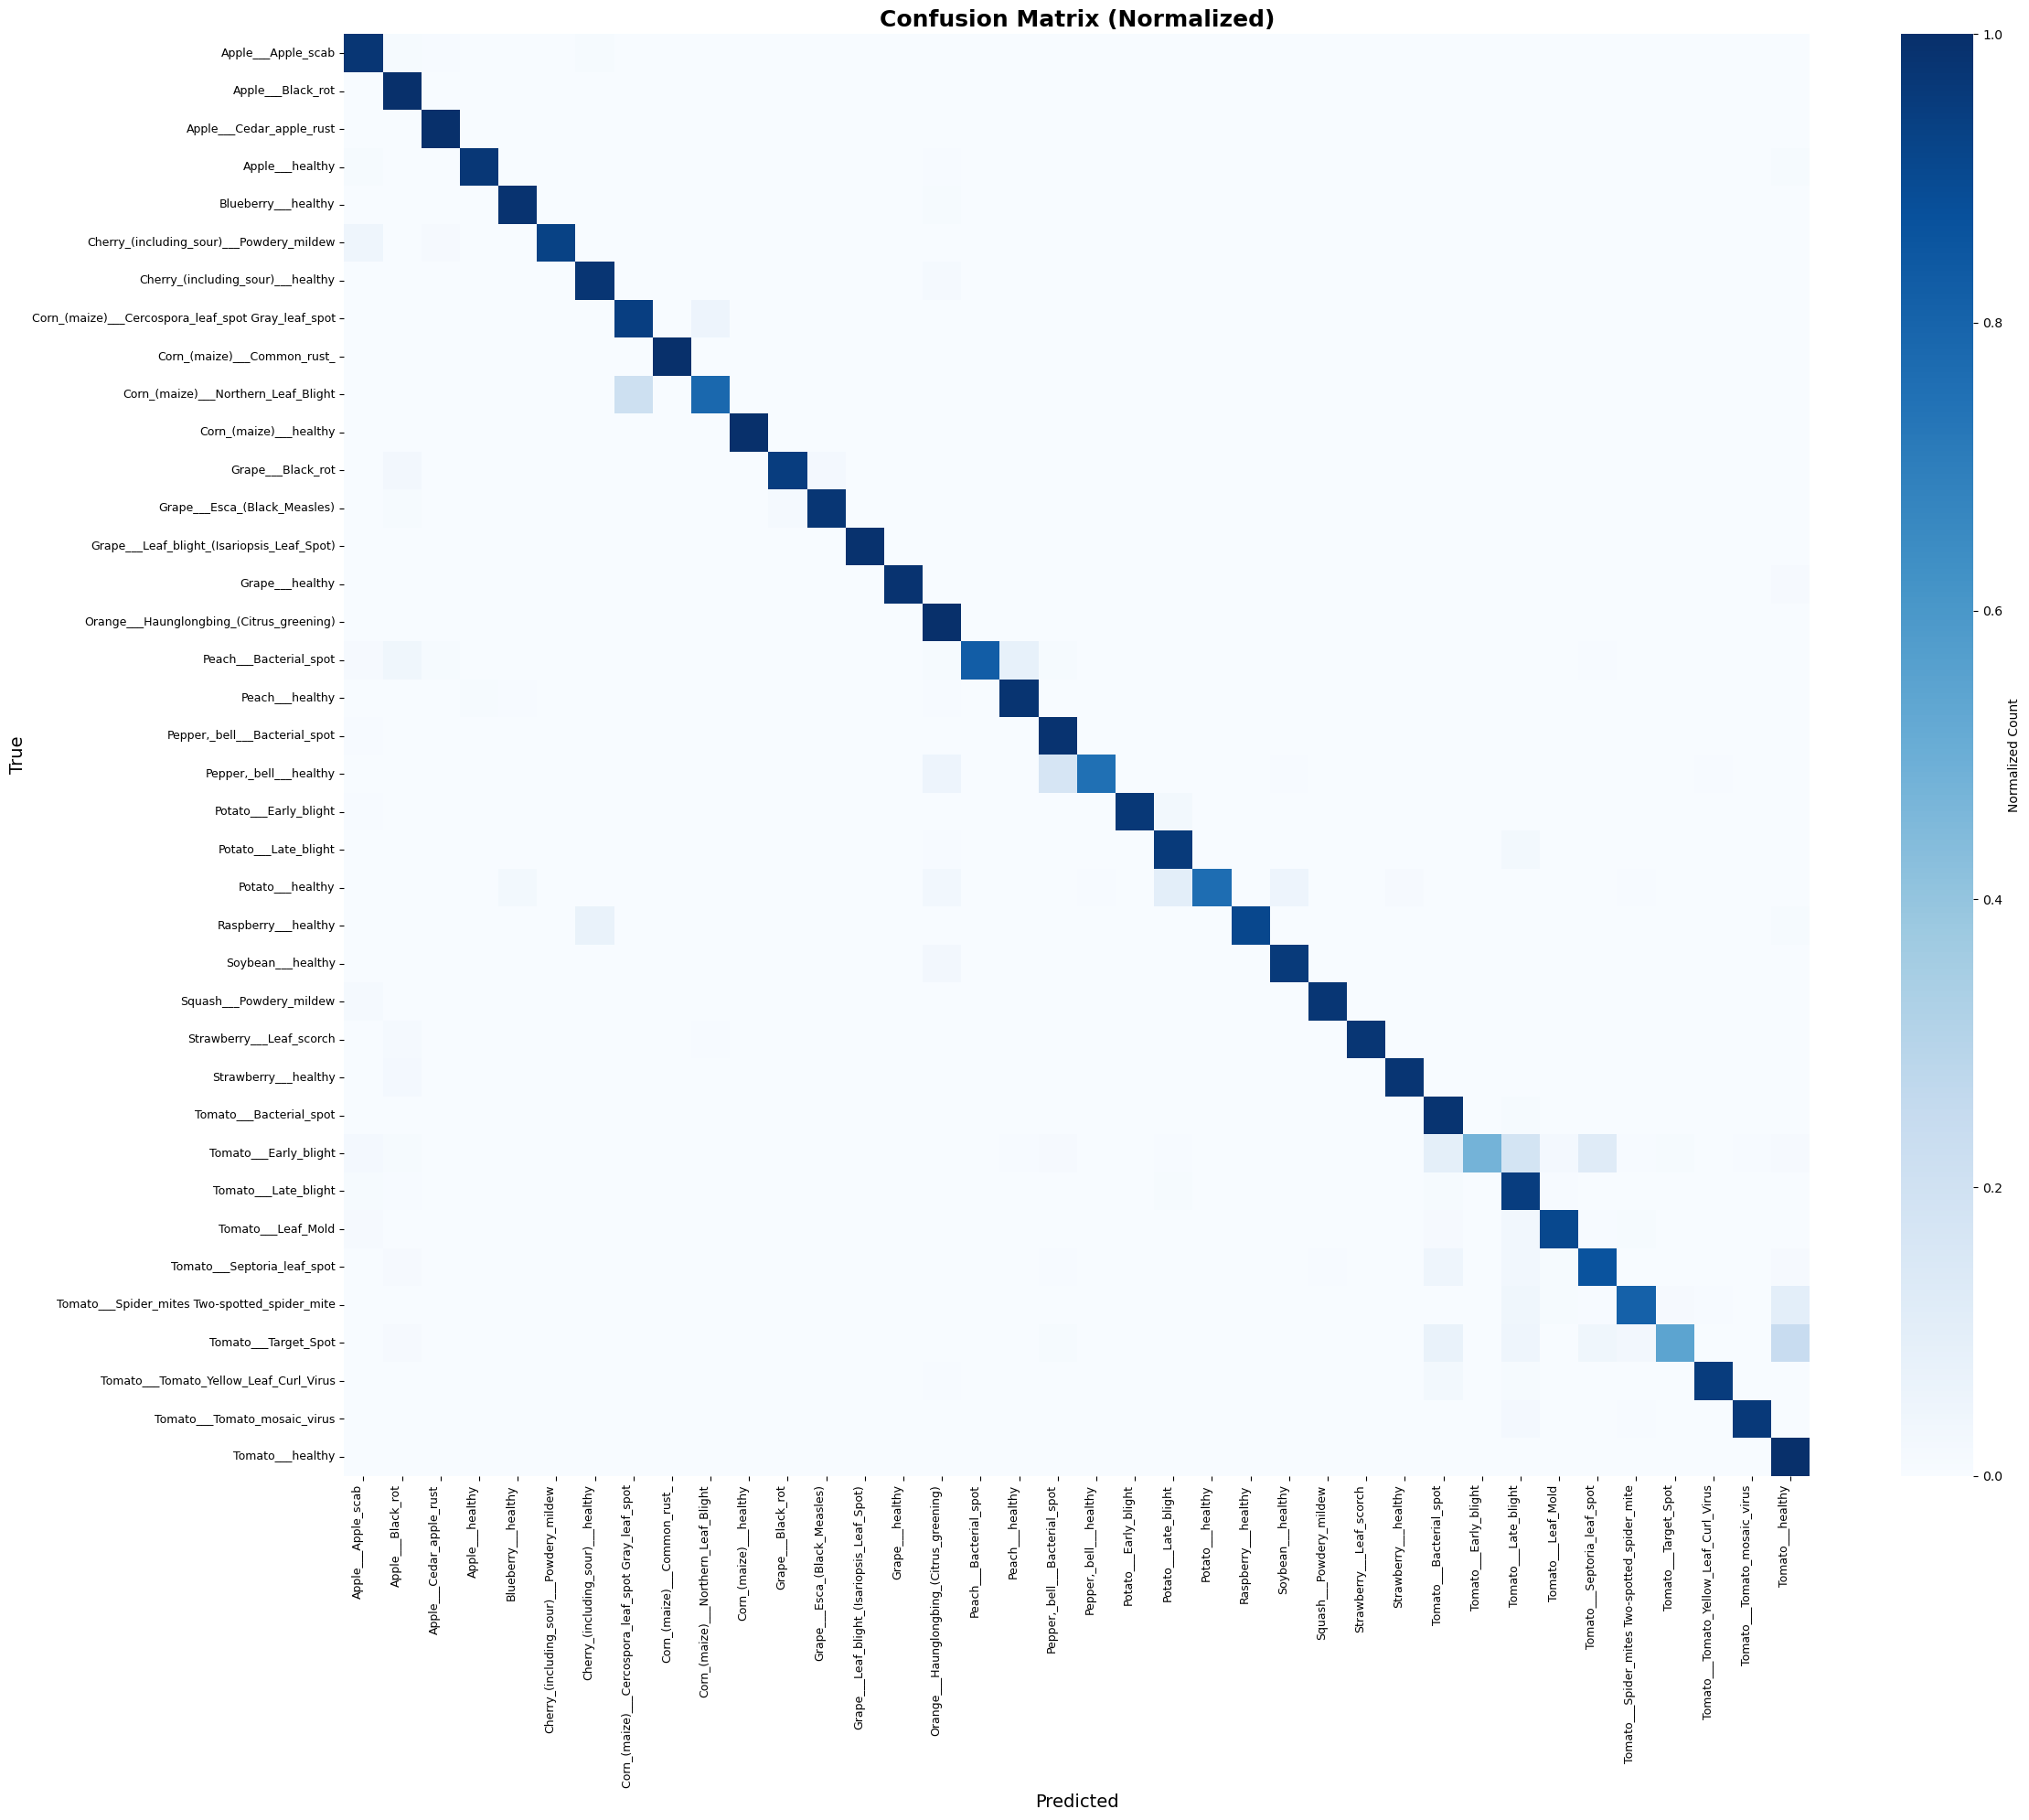


CLASSIFICATION REPORT
                                                    precision    recall  f1-score   support

                                Apple___Apple_scab     0.7241    0.9746    0.8309       630
                                 Apple___Black_rot     0.7053    0.9984    0.8267       621
                          Apple___Cedar_apple_rust     0.8308    1.0000    0.9076       275
                                   Apple___healthy     0.9803    0.9696    0.9749      1645
                               Blueberry___healthy     0.9834    0.9874    0.9854      1502
          Cherry_(including_sour)___Powdery_mildew     0.9919    0.9335    0.9618      1052
                 Cherry_(including_sour)___healthy     0.9268    0.9789    0.9522       854
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.6944    0.9435    0.8000       513
                       Corn_(maize)___Common_rust_     0.9925    0.9983    0.9954      1192
               Corn_(maize)___Northern_Leaf_Blight     0

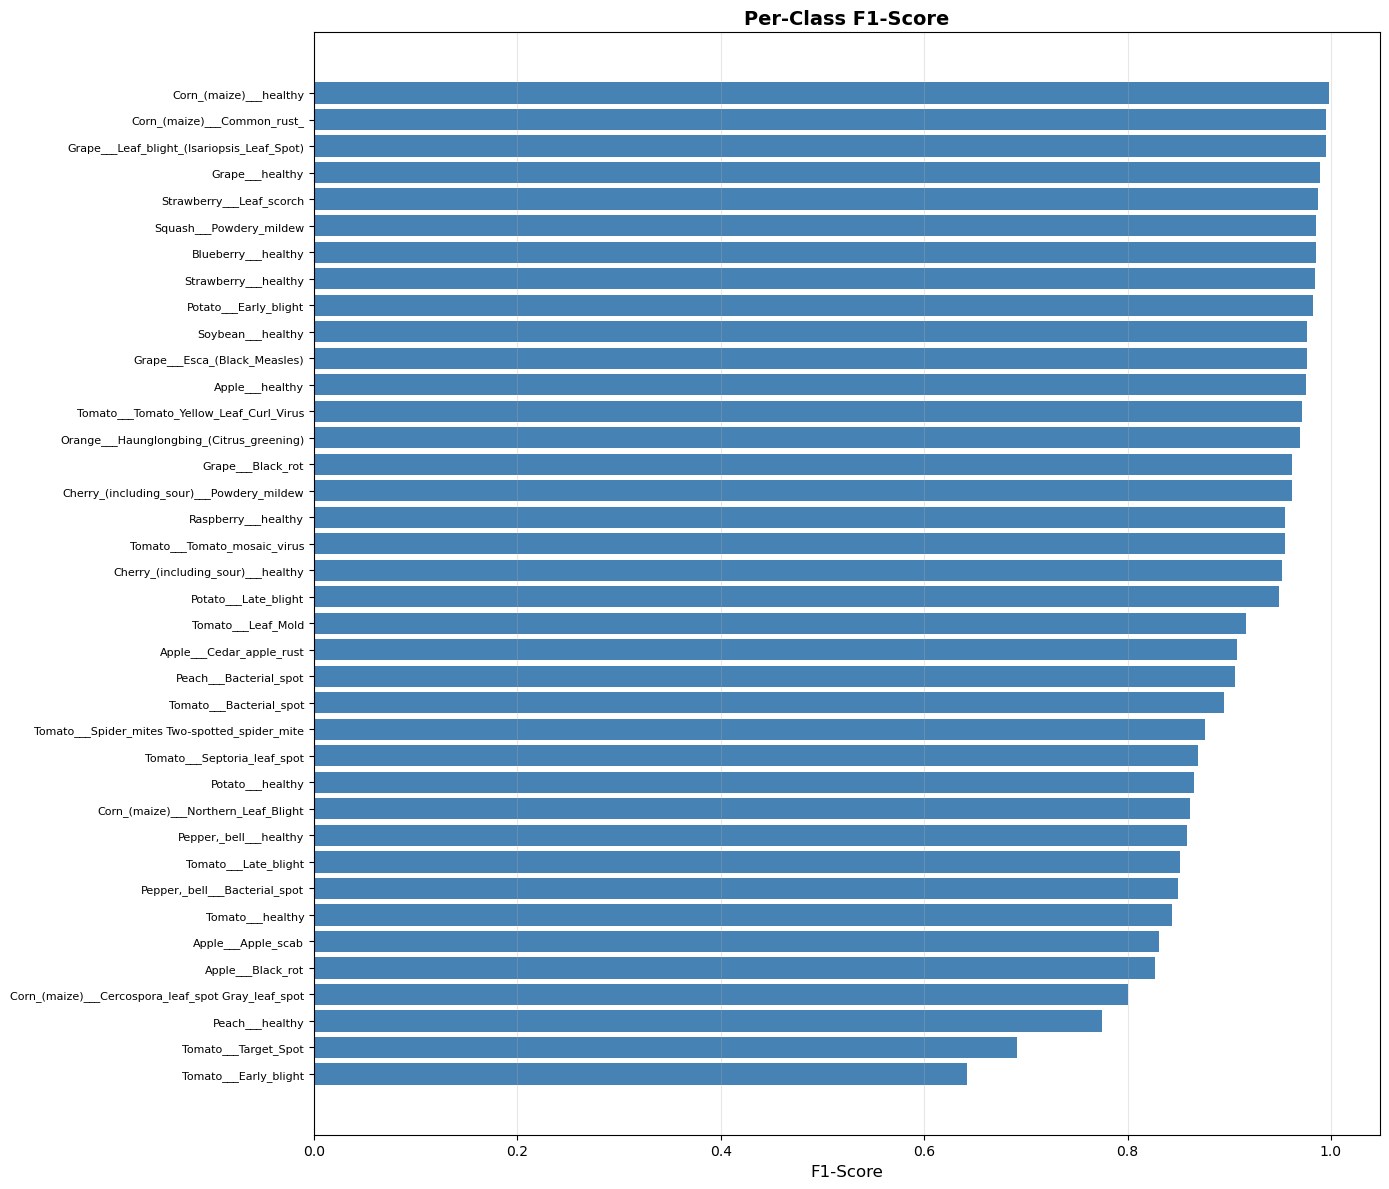


SINGLE IMAGE PREDICTION EXAMPLE

📸 Testing with: 00045d08-898c-40df-ada6-e7579637a1f9___UF.Citrus_HLB_Lab 1690.JPG
   True class: Orange___Haunglongbing_(Citrus_greening)

🌿 Predicted: Orange___Haunglongbing_(Citrus_greening)
   Confidence: 100.00%
   Correct: ✅ YES

🔝 Top 5 Predictions:
   1. Orange___Haunglongbing_(Citrus_greening): 100.00%
   2. Corn_(maize)___Northern_Leaf_Blight: 0.00%
   3. Tomato___Bacterial_spot: 0.00%
   4. Tomato___Tomato_Yellow_Leaf_Curl_Virus: 0.00%
   5. Potato___Late_blight: 0.00%

✅ Prediction visualization saved to single_prediction_example.png


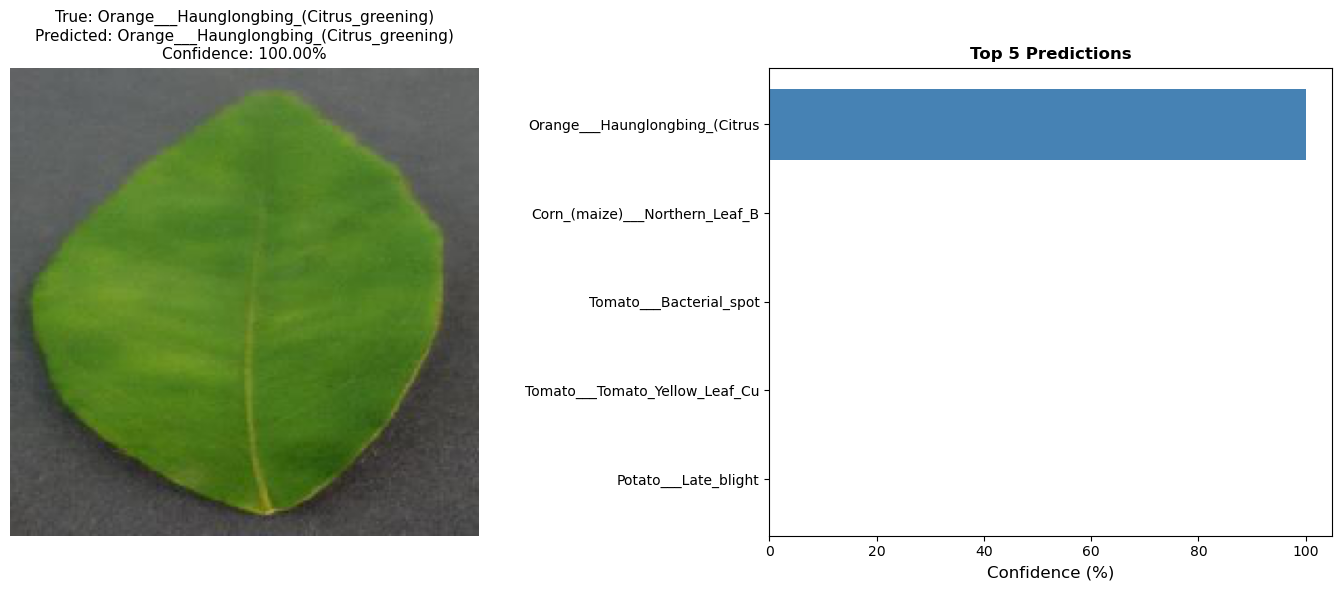


🎉 EVALUATION COMPLETE!

📁 Generated files:
   • confusion_matrix.png
   • classification_report.txt
   • per_class_metrics.csv
   • per_class_f1score.png
   • single_prediction_example.png


In [10]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# -------------------------------
# Load model
# -------------------------------
model_path = r"C:\Users\anask\crop-disease-detection\models\saved_models\best_model.h5"
model = tf.keras.models.load_model(model_path)
print("✅ Model loaded successfully")

# -------------------------------
# CORRECT Data Path - Point to 'color' folder
# -------------------------------
data_dir = r"C:\Users\anask\crop-disease-detection\data\raw\plantvillage-dataset\plantvillage dataset\color"

# Verify the structure first
import os
from pathlib import Path

subdirs = [d for d in Path(data_dir).iterdir() if d.is_dir()]
print(f"\n📁 Found {len(subdirs)} class folders in: {data_dir}")
print(f"   Sample classes: {[d.name for d in subdirs[:3]]}")

# -------------------------------
# Data generator (NO validation_split, we'll use all data)
# -------------------------------
datagen = ImageDataGenerator(rescale=1./255)

val_gen = datagen.flow_from_directory(
    data_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    shuffle=False
)

print(f"\n✅ Generator created:")
print(f"   Classes: {val_gen.num_classes}")
print(f"   Total images: {val_gen.samples}")

# -------------------------------
# Get class labels properly
# -------------------------------
class_indices = val_gen.class_indices
class_labels = sorted(class_indices.keys(), key=lambda x: class_indices[x])

print(f"\n📊 Class labels (first 5):")
for i, label in enumerate(class_labels[:5]):
    print(f"   {i}. {label}")

# -------------------------------
# Predictions
# -------------------------------
print("\n🔄 Making predictions (this may take a few minutes)...")
y_pred = model.predict(val_gen, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_gen.classes

print(f"\n✅ Predictions complete")
print(f"   Samples evaluated: {len(y_true)}")
print(f"   Unique classes in data: {len(np.unique(y_true))}")

# -------------------------------
# Overall Metrics
# -------------------------------
accuracy = accuracy_score(y_true, y_pred_classes)
precision, recall, f1, _ = precision_recall_fscore_support(
    y_true, y_pred_classes, average='weighted', zero_division=0
)

print("\n" + "="*70)
print("OVERALL METRICS")
print("="*70)
print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")

# -------------------------------
# Confusion Matrix (Normalized)
# -------------------------------
print("\n📈 Generating confusion matrix...")
cm = confusion_matrix(y_true, y_pred_classes)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(24, 20))
sns.heatmap(
    cm_normalized, 
    annot=False,  # Too many classes for numbers
    fmt='.2f', 
    cmap="Blues", 
    xticklabels=class_labels, 
    yticklabels=class_labels,
    cbar_kws={'label': 'Normalized Count'}
)
plt.xlabel("Predicted", fontsize=14)
plt.ylabel("True", fontsize=14)
plt.title("Confusion Matrix (Normalized)", fontsize=18, fontweight='bold')
plt.xticks(rotation=90, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=150, bbox_inches='tight')
print("✅ Confusion matrix saved to confusion_matrix.png")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("\n" + "="*70)
print("CLASSIFICATION REPORT")
print("="*70)

report = classification_report(
    y_true, 
    y_pred_classes, 
    target_names=class_labels,
    zero_division=0,
    digits=4
)
print(report)

# Save to file
with open('classification_report.txt', 'w') as f:
    f.write(report)
print("\n✅ Classification report saved to classification_report.txt")

# -------------------------------
# Per-Class Accuracy (Top 10 Best & Worst)
# -------------------------------
report_dict = classification_report(
    y_true, y_pred_classes, 
    target_names=class_labels,
    output_dict=True,
    zero_division=0
)

class_metrics = []
for label in class_labels:
    if label in report_dict:
        class_metrics.append({
            'class': label,
            'f1-score': report_dict[label]['f1-score'],
            'precision': report_dict[label]['precision'],
            'recall': report_dict[label]['recall'],
            'support': report_dict[label]['support']
        })

import pandas as pd
df_metrics = pd.DataFrame(class_metrics)
df_metrics = df_metrics.sort_values('f1-score', ascending=False)

print("\n" + "="*70)
print("TOP 10 BEST PERFORMING CLASSES")
print("="*70)
print(df_metrics.head(10).to_string(index=False))

print("\n" + "="*70)
print("TOP 10 WORST PERFORMING CLASSES")
print("="*70)
print(df_metrics.tail(10).to_string(index=False))

# Save to CSV
df_metrics.to_csv('per_class_metrics.csv', index=False)
print("\n✅ Per-class metrics saved to per_class_metrics.csv")

# -------------------------------
# Visualize Per-Class Performance
# -------------------------------
plt.figure(figsize=(14, 12))
df_sorted = df_metrics.sort_values('f1-score', ascending=True)

y_pos = np.arange(len(df_sorted))
plt.barh(y_pos, df_sorted['f1-score'], color='steelblue')
plt.yticks(y_pos, df_sorted['class'], fontsize=8)
plt.xlabel('F1-Score', fontsize=12)
plt.title('Per-Class F1-Score', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.savefig('per_class_f1score.png', dpi=150, bbox_inches='tight')
print("✅ Per-class F1-score chart saved to per_class_f1score.png")
plt.show()

# -------------------------------
# Predict on a single image
# -------------------------------
print("\n" + "="*70)
print("SINGLE IMAGE PREDICTION EXAMPLE")
print("="*70)

# Use a random image from the dataset
sample_class = np.random.choice(class_labels)
sample_class_path = Path(data_dir) / sample_class
sample_images = list(sample_class_path.glob('*.JPG')) + list(sample_class_path.glob('*.jpg'))

if sample_images:
    img_path = sample_images[0]
    print(f"\n📸 Testing with: {img_path.name}")
    print(f"   True class: {sample_class}")
    
    img = load_img(img_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    pred = model.predict(img_array, verbose=0)
    pred_class_idx = np.argmax(pred, axis=1)[0]
    confidence = np.max(pred) * 100
    
    # Get top 5 predictions
    top_5_idx = np.argsort(pred[0])[-5:][::-1]
    
    print(f"\n🌿 Predicted: {class_labels[pred_class_idx]}")
    print(f"   Confidence: {confidence:.2f}%")
    print(f"   Correct: {'✅ YES' if class_labels[pred_class_idx] == sample_class else '❌ NO'}")
    
    print(f"\n🔝 Top 5 Predictions:")
    for i, idx in enumerate(top_5_idx, 1):
        print(f"   {i}. {class_labels[idx]}: {pred[0][idx]*100:.2f}%")
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    axes[0].imshow(img)
    axes[0].set_title(f'True: {sample_class}\nPredicted: {class_labels[pred_class_idx]}\nConfidence: {confidence:.2f}%',
                     fontsize=11)
    axes[0].axis('off')
    
    top_5_probs = pred[0][top_5_idx] * 100
    top_5_labels = [class_labels[i][:30] for i in top_5_idx]  # Truncate long names
    
    axes[1].barh(range(5), top_5_probs, color='steelblue')
    axes[1].set_yticks(range(5))
    axes[1].set_yticklabels(top_5_labels, fontsize=10)
    axes[1].set_xlabel('Confidence (%)', fontsize=12)
    axes[1].set_title('Top 5 Predictions', fontsize=12, fontweight='bold')
    axes[1].invert_yaxis()
    
    plt.tight_layout()
    plt.savefig('single_prediction_example.png', dpi=150, bbox_inches='tight')
    print("\n✅ Prediction visualization saved to single_prediction_example.png")
    plt.show()

print("\n" + "="*70)
print("🎉 EVALUATION COMPLETE!")
print("="*70)
print("\n📁 Generated files:")
print("   • confusion_matrix.png")
print("   • classification_report.txt")
print("   • per_class_metrics.csv")
print("   • per_class_f1score.png")
print("   • single_prediction_example.png")